In [2]:
import json
import pandas as pd
import datetime as dt

data_for_analysis = pd.DataFrame()

with open('tags_data.json', 'r') as file:
    for line in file:      
        data = json.loads(line)
        df = pd.json_normalize(data)
        data_for_analysis = pd.concat([data_for_analysis,df], sort = False, axis = 0)
        


In [3]:
data_for_analysis = data_for_analysis.loc[(data_for_analysis.date > 1645660800)]

In [4]:
import datetime as dt
def ts2dt(ts):
  return dt.datetime.fromtimestamp(ts)

def get_date_only(dt):
  return dt.date()

data_for_analysis['date'] = data_for_analysis['date'].apply(ts2dt)
data_for_analysis['date'] = data_for_analysis['date'].apply(get_date_only)


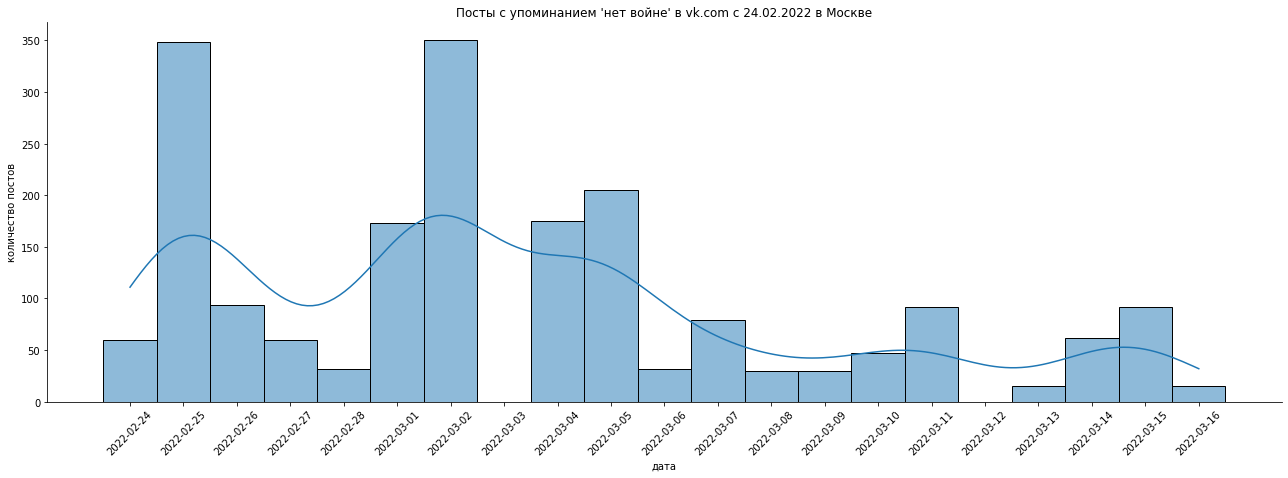

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plot = sns.displot(data_for_analysis["date"], discrete=True, kde=True, height=6, aspect=3)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xticks(ticks=pd.date_range(start=data_for_analysis["date"].min(), end=data_for_analysis["date"].max(), periods=21), rotation=45)
plt.title("Посты с упоминанием 'нет войне' в vk.com c 24.02.2022 в Москве")
plt.xlabel("дата")
plt.ylabel("количество постов")
plt.show()
